In [1]:
import numpy as np


def distance(u, v, p=2):
    """计算两个向量的距离"""
    return np.sum(np.abs(u - v) ** p) ** (1 / p)


def init_centroids(X, k):
    """随机选择k个质心"""
    index = np.random.choice(np.arange(len(X)), k, replace=False)
    return X[index]


def closest_centroid(sample, centroids):
    """找到跟样本最近的质心"""
    distances = [distance(sample, centroid) for i, centroid in enumerate(centroids)]
    return np.argmin(distances)


def build_clusters(X, centroids):
    """根据质心将数据分成簇"""
    clusters = [[] for _ in range(len(centroids))]
    for i, sample in enumerate(X):
        centroid_index = closest_centroid(sample, centroids)
        clusters[centroid_index].append(i)
    return clusters


def update_centroids(X, clusters):
    """更新质心的位置"""
    return np.array([np.mean(X[cluster], axis=0) for cluster in clusters])


def make_label(X, clusters):
    """生成标签"""
    labels = np.zeros(len(X))
    for i, cluster in enumerate(clusters):
        for j in cluster:
            labels[j] = i
    return labels


def kmeans(X, *, k, max_iter=1000, tol=1e-4):
    """KMeans聚类"""
    # 随机选择k个质心
    centroids = init_centroids(X, k)
    # 通过不断的迭代对数据进行划分
    for _ in range(max_iter):
        # 通过质心将数据划分到不同的簇
        clusters = build_clusters(X, centroids)
        # 重新计算新的质心的位置
        new_centroids = update_centroids(X, clusters)
        # 如果质心几乎没有变化就提前终止迭代
        if np.allclose(new_centroids, centroids, rtol=tol):
            break
        # 记录新的质心的位置
        centroids = new_centroids
    # 给数据生成标签
    return make_label(X, clusters), centroids

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target
labels, centers = kmeans(X, k=3)

o
x
^


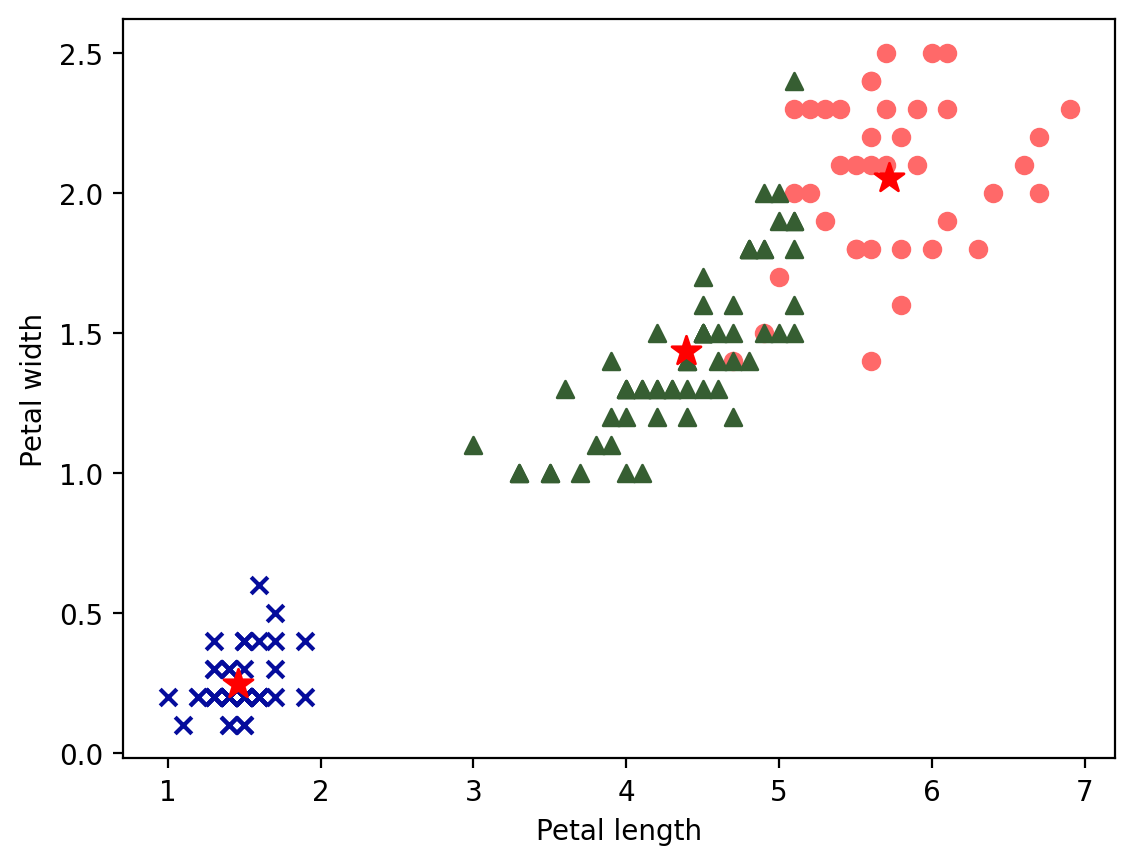

In [3]:
import matplotlib.pyplot as plt

colors = ['#FF6969', '#050C9C', '#365E32']
markers = ['o', 'x', '^']

plt.figure(dpi=200)
for i in range(len(centers)):
    samples = X[labels == i]
    print(markers[i])
    plt.scatter(samples[:, 2], samples[:, 3], marker=markers[i], color=colors[i])
    plt.scatter(centers[i, 2], centers[i, 3], marker='*', color='r', s=120)

plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

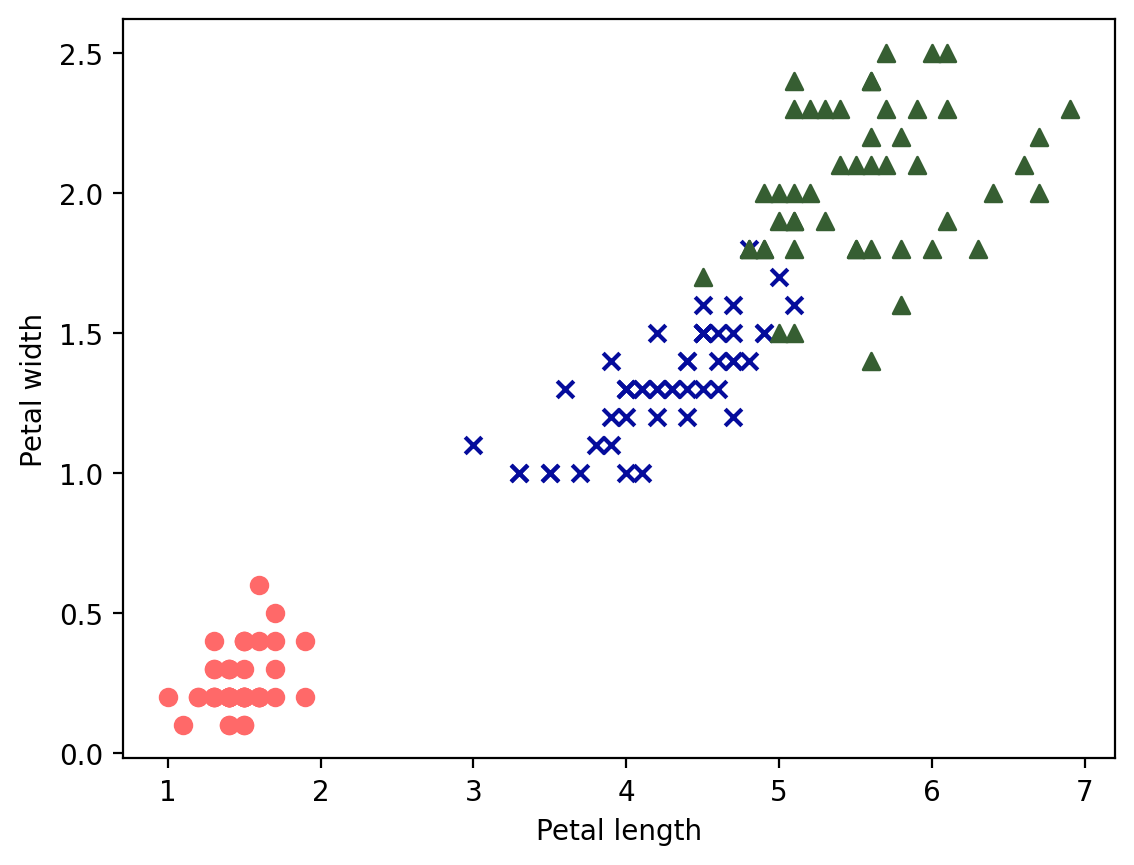

In [4]:
import matplotlib.pyplot as plt

colors = ['#FF6969', '#050C9C', '#365E32']
markers = ['o', 'x', '^']

plt.figure(dpi=200)
for i in range(len(centers)):
    samples = X[y == i]
    plt.scatter(samples[:, 2], samples[:, 3], marker=markers[i], color=colors[i])

plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

In [5]:
from sklearn.cluster import KMeans

# 创建KMeans对象
km_cluster = KMeans(
    n_clusters=3,       # k值（簇的数量）
    max_iter=30,        # 最大迭代次数
    n_init=10,          # 初始质心选择尝试次数
    init='k-means++',   # 初始质心选择算法
    algorithm='elkan',  # 是否使用三角不等式优化
    tol=1e-4,           # 质心变化容忍度
    random_state=3      # 随机数种子
)
# 训练模型
km_cluster.fit(X)
print(km_cluster.labels_)           # 分簇的标签
print(km_cluster.cluster_centers_)  # 各个质心的位置
print(km_cluster.inertia_)          # 样本到质心的距离平方和

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]
78.85144142614601
